In [266]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objs as go

from api_key_container import api_key

In [213]:
url = "https://api.marketstack.com/v1/tickers?access_key=" + api_key
response = requests.get(url)
response_json = response.json()

In [214]:
companies = response_json['data']
df = pd.json_normalize(companies, meta=['name'])

In [215]:
url = "https://api.marketstack.com/v1/eod?access_key=" + api_key
querystring = {"symbols":"MSFT","date_from":"2023-12-19", "date_to":"2024-12-19"}
response = requests.get(url, params=querystring)

In [216]:
historical_data = response.json()['data']

In [257]:
df = pd.json_normalize(historical_data, meta=['date'])

In [218]:
df['date'] = pd.to_datetime(df['date'])

In [219]:
monthly = df.groupby(pd.Grouper(key='date', freq='M')).mean()

In [220]:
weekly = df.groupby(pd.Grouper(key='date', freq='W')).mean()

In [221]:
def shorten_date(date):
    return date[0:10]

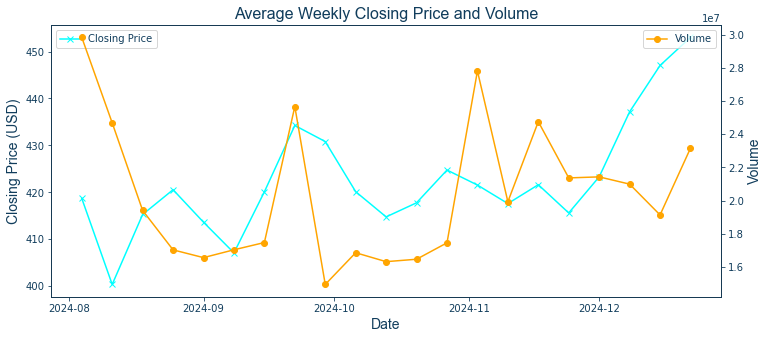

In [313]:
color = '#113d5c'

fig, ax = plt.subplots(figsize=(12,5))
ax2 = ax.twinx()
ax.set_title('Average Weekly Closing Price and Volume', family='Arial', size=16, color=color)
ax.set_xlabel('Date', family='Arial', size=14, color=color)
plt.xticks(rotation=90)
plt.plot(kind='bar')
ax.plot(weekly['adj_close'], label='Closing Price', color='cyan', marker='x')
ax2.plot(weekly['volume'], label='Volume', color='orange', marker='o')
ax.set_ylabel('Closing Price (USD)', family='Arial', size=14, color=color)
ax2.set_ylabel('Volume', family='Arial', size=14, color=color)
ax2.spines['right'].set_color(color)
ax2.spines['left'].set_color(color)
ax2.spines['top'].set_color(color)
ax2.spines['bottom'].set_color(color)
# ax.xaxis.label.set_color('red')
ax.tick_params(colors=color)
ax2.tick_params(colors=color)
legend1 = ax.legend(loc='upper left')
for text in legend1.get_texts():
    text.set_color(color)
legend2 = ax2.legend()
for text in legend2.get_texts():
    text.set_color(color)
plt.show()

In [223]:
print('Highest Volume')
int(df['volume'].max())

Highest Volume


55155300

In [224]:
print('Lowest Volume')
int(df['volume'].min())

Lowest Volume


13134700

In [225]:
print('Highest Price (Adjusted)')
round(df['adj_high'].max(), 2)

Highest Price (Adjusted)


456.16

In [226]:
print('Lowest Price (Adjusted)')
df['adj_low'].min()

Lowest Price (Adjusted)


385.58

In [251]:
int(df['volume'].mean())

20331555

In [253]:
round(df['adj_high'].mean(), 2)

425.41

In [254]:
round(df['adj_low'].mean(), 2)

418.21

In [255]:
round(df['adj_close'].mean(), 2)

421.87

In [231]:
print('Last Week')

Last Week


In [232]:
print('Average Volume')

Average Volume


In [233]:
df_last_week = df.loc[df['date'].between('2024-12-11','2024-12-17', inclusive=True)]
int(df_last_week['volume'].mean())

20875650

In [234]:
print('Highest Price (Adjusted)')

Highest Price (Adjusted)


In [235]:
round(df_last_week['adj_high'].max(), 2)

456.16

In [236]:
print('Lowest Price (Adjusted)')

Lowest Price (Adjusted)


In [237]:
round(df_last_week['adj_low'].min(), 2)

444.05

In [238]:
print('Average Closing Price (Adjusted)')

Average Closing Price (Adjusted)


In [239]:
round(df_last_week['adj_close'].mean(), 2)

450.37

In [240]:
print('Last Two Weeks')

Last Two Weeks


In [241]:
df_last_two_weeks = df.loc[df['date'].between('2024-12-04','2024-12-17', inclusive=True)]

In [242]:
int(df_last_two_weeks['volume'].mean())

20842295

In [243]:
round(df_last_two_weeks['adj_high'].max(), 2)

456.16

In [244]:
round(df_last_two_weeks['adj_low'].min(), 2)

432.63

In [245]:
round(df_last_two_weeks['adj_close'].mean(), 2)

446.48

In [258]:
print('Last Six Months')

Last Six Months


In [247]:
int(df['volume'].mean())

20331555

In [248]:
round(df['adj_high'].max(), 2)

456.16

In [249]:
round(df['adj_low'].min(), 2)

385.58

In [250]:
round(df['adj_close'].mean(), 2)

421.87

In [261]:
df

,open,high,low,close,volume,adj_high,adj_low,adj_close,adj_open,adj_volume,split_factor,dividend,symbol,exchange,date
0,451.010,455.2900,449.57,454.46,22716300.0,455.2900,449.5700,454.46,451.010,22733494.0,1.0,0.0,MSFT,XNAS,2024-12-17T00:00:00+0000
1,447.270,452.1800,445.28,451.59,23586700.0,452.1800,445.2800,451.59,447.270,23598834.0,1.0,0.0,MSFT,XNAS,2024-12-16T00:00:00+0000
2,448.440,451.4300,445.58,447.27,20172200.0,451.4300,445.5800,447.27,448.435,20177833.0,1.0,0.0,MSFT,XNAS,2024-12-13T00:00:00+0000
3,449.555,456.1648,449.13,449.56,20719891.0,456.1648,449.1100,449.56,449.110,20834779.0,1.0,0.0,MSFT,XNAS,2024-12-12T00:00:00+0000
4,444.050,450.3500,444.05,448.99,17183159.0,450.3500,444.0500,448.99,444.050,19200208.0,1.0,0.0,MSFT,XNAS,2024-12-11T00:00:00+0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,412.490,415.0000,404.34,408.49,29399700.0,415.0000,404.3400,408.49,412.490,29437900.0,1.0,0.0,MSFT,XNAS,2024-08-02T00:00:00+0000
96,420.790,427.4600,413.09,417.11,30229100.0,427.4600,413.0901,417.11,420.785,30296400.0,1.0,0.0,MSFT,XNAS,2024-08-01T00:00:00+0000
97,420.500,421.7800,412.21,418.35,42806400.0,421.7750,412.2100,418.35,420.495,42891366.0,1.0,0.0,MSFT,XNAS,2024-07-31T00:00:00+0000
98,427.720,429.0500,417.36,422.92,31694300.0,429.0500,417.3600,422.92,427.720,32687578.0,1.0,0.0,MSFT,XNAS,2024-07-30T00:00:00+0000


In [315]:
candlestick_chart = go.Figure(data=[go.Candlestick(x=df['date'], open=df['adj_open'], high=df['adj_high'], low=df['adj_low'], close=df['adj_close'])])
candlestick_chart.update_layout(title='Candlestick Chart', xaxis_title='Date', yaxis_title='Price (USD)', font_family='Arial', font_color=color, xaxis_rangeslider_visible=False)
candlestick_chart.show()